<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/Titanic_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [43]:
data = pd.read_csv(r"/content/Tianic/data.csv")

In [44]:
data.info() # Age,Cabin,Embarked中有数据缺失，同时决策树只能处理数字型，Name,Sex,Ticket,Cabin,Embarked需要处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
data.head(10) # 显示前n行（默认5）

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1. 数据预处理

In [46]:
#筛选特征(对cabin，name，ticket相关性比较差的先删去)
data.drop(["Cabin","Name","Ticket"], inplace=True, axis=1) # inplace=True表示用处理完的数据替代原表, axis=1删除列

In [47]:
# 处理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())  # fillna表示填充缺失值
# Embarked中缺失的数据量比较小，可以直接删去
data = data.dropna()

In [48]:
# 将三分类变量转换为数值型变量(转换多分类都可以)------只适用于多个独立的类别
labels = data["Embarked"].unique().tolist() # 取出Embarked当中的类别并转换成列表
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))  # 将Embarked中的类别转换成其索引
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [49]:
# 很适合用于二分类方法
data["Sex"] = (data["Sex"]=="male").astype("int") # 将括号中的判断bool值进行转换为int值，Ture-->1, False-->0
# data.iloc[:, "Sex"]同上
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [50]:
x = data.iloc[:, data.columns != "Survived"]
y = data.iloc[:, data.columns == "Survived"]

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3) # 随机划分但索引没有规律

In [58]:
# 修正训练集和测试集的索引
for i in xtrain, xtest, ytrain, ytest:
  i.index = range(i.shape[0])

In [64]:
clf = DecisionTreeClassifier(random_state=25)
clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
score

0.7265917602996255

In [65]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7469611848825333

0.8166624106230849


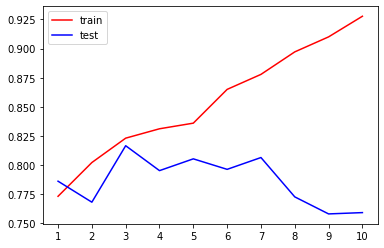

In [67]:
tr = []
te = []

for i in range(10):
  clf = DecisionTreeClassifier(random_state=25
                 ,max_depth=i+1
                 ,criterion="entropy"
                 )
  clf = clf.fit(xtrain, ytrain)
  score_tr = clf.score(xtrain, ytrain)
  score_te = cross_val_score(clf,x,y,cv=10).mean()
  tr.append(score_tr)
  te.append(score_te)
print(max(te))
plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()




In [70]:
# 网格搜索调整参数：能够帮助同时调整多个参数的技术，枚举技术
gini_thresholds = np.linspace(0,0.5,20) # 0-0.5个按大小排列的50个随机数
#
parameters = {
    "criterion":("ginin","entropy")
    ,"splitter":("best","random")
    ,"max_depth":[*range(1,10)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10) # 同时满足fit，score，交叉验证三个功能
GS.fit(xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36000 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'ginin'

  warnings.warn(some_fits_faile

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('ginin', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
       

In [73]:
GS.best_params_ # 返回输入参数和参数取值中的最佳组合

{'criterion': 'entropy',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [74]:
GS.best_score_   # 网格搜索的评价标准

# 网格搜索只能在所给定的参数中找到最好的组合，而不能把其中的参数进行舍弃

0.8118279569892474